/tmp/ipykernel_4009096/2176503577.py:29: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir, dpi=300)
/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


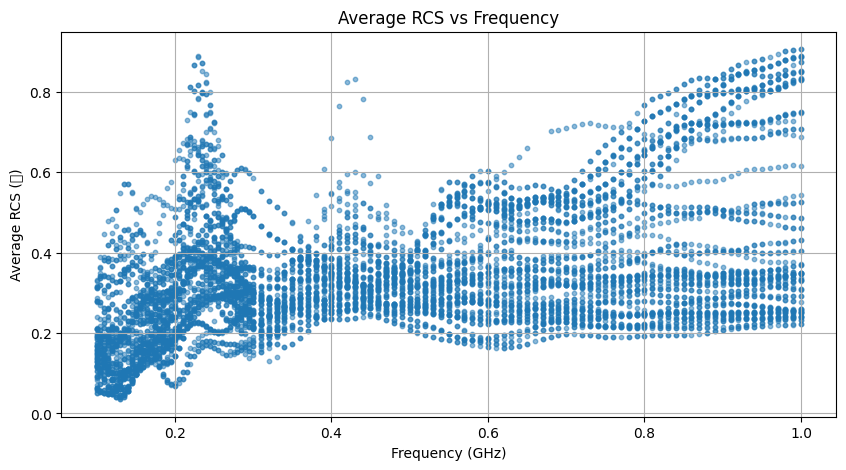

In [ ]:
# 不区分入射角颜色
from net.utils import EMRCSDataset
import torch.utils.data.dataloader as DataLoader
import matplotlib.pyplot as plt

rcsdir = r'/mnt/truenas_jiangxiaotian/allplanes/mie/b943_mie_train'
save_dir = f'output/datamining/{rcsdir.split("/")[-1]}:aveRCS_allInc.png'
dataset = EMRCSDataset(rcsdir)
# dataloader = DataLoader.DataLoader(dataset, batch_size=2, shuffle=False)
dataloader = DataLoader.DataLoader(dataset, batch_size=12, shuffle=False, num_workers=16, pin_memory=True)
rcs1 = []
f1 = []

for i, data in enumerate(dataloader):
    label, rcs = data[0], data[1] # label = [plane,theta,phi,freq], rcs.shape = [batch, 361, 720]
    ave_rcs = rcs.mean(dim=(1,2))  # tensor([0.3326, 0.4545])
    rcs1.extend(ave_rcs.tolist())
    f1.extend(label[3].tolist())

plt.figure(figsize=(10, 5))
# plt.scatter(f1, rcs1, s=10, c='blue', alpha=0.5)
plt.scatter(f1, rcs1, s=10, alpha=0.5)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Average RCS (㎡)')
# plt.ylabel('Average RCS (dBsm)')
plt.title('Average RCS vs Frequency')
plt.grid(True)
plt.savefig(save_dir, dpi=300)
plt.show()

/tmp/ipykernel_4009096/1555298666.py:48: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4009096/1555298666.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_4009096/1555298666.py:49: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir, dpi=300, bbox_inches='tight')


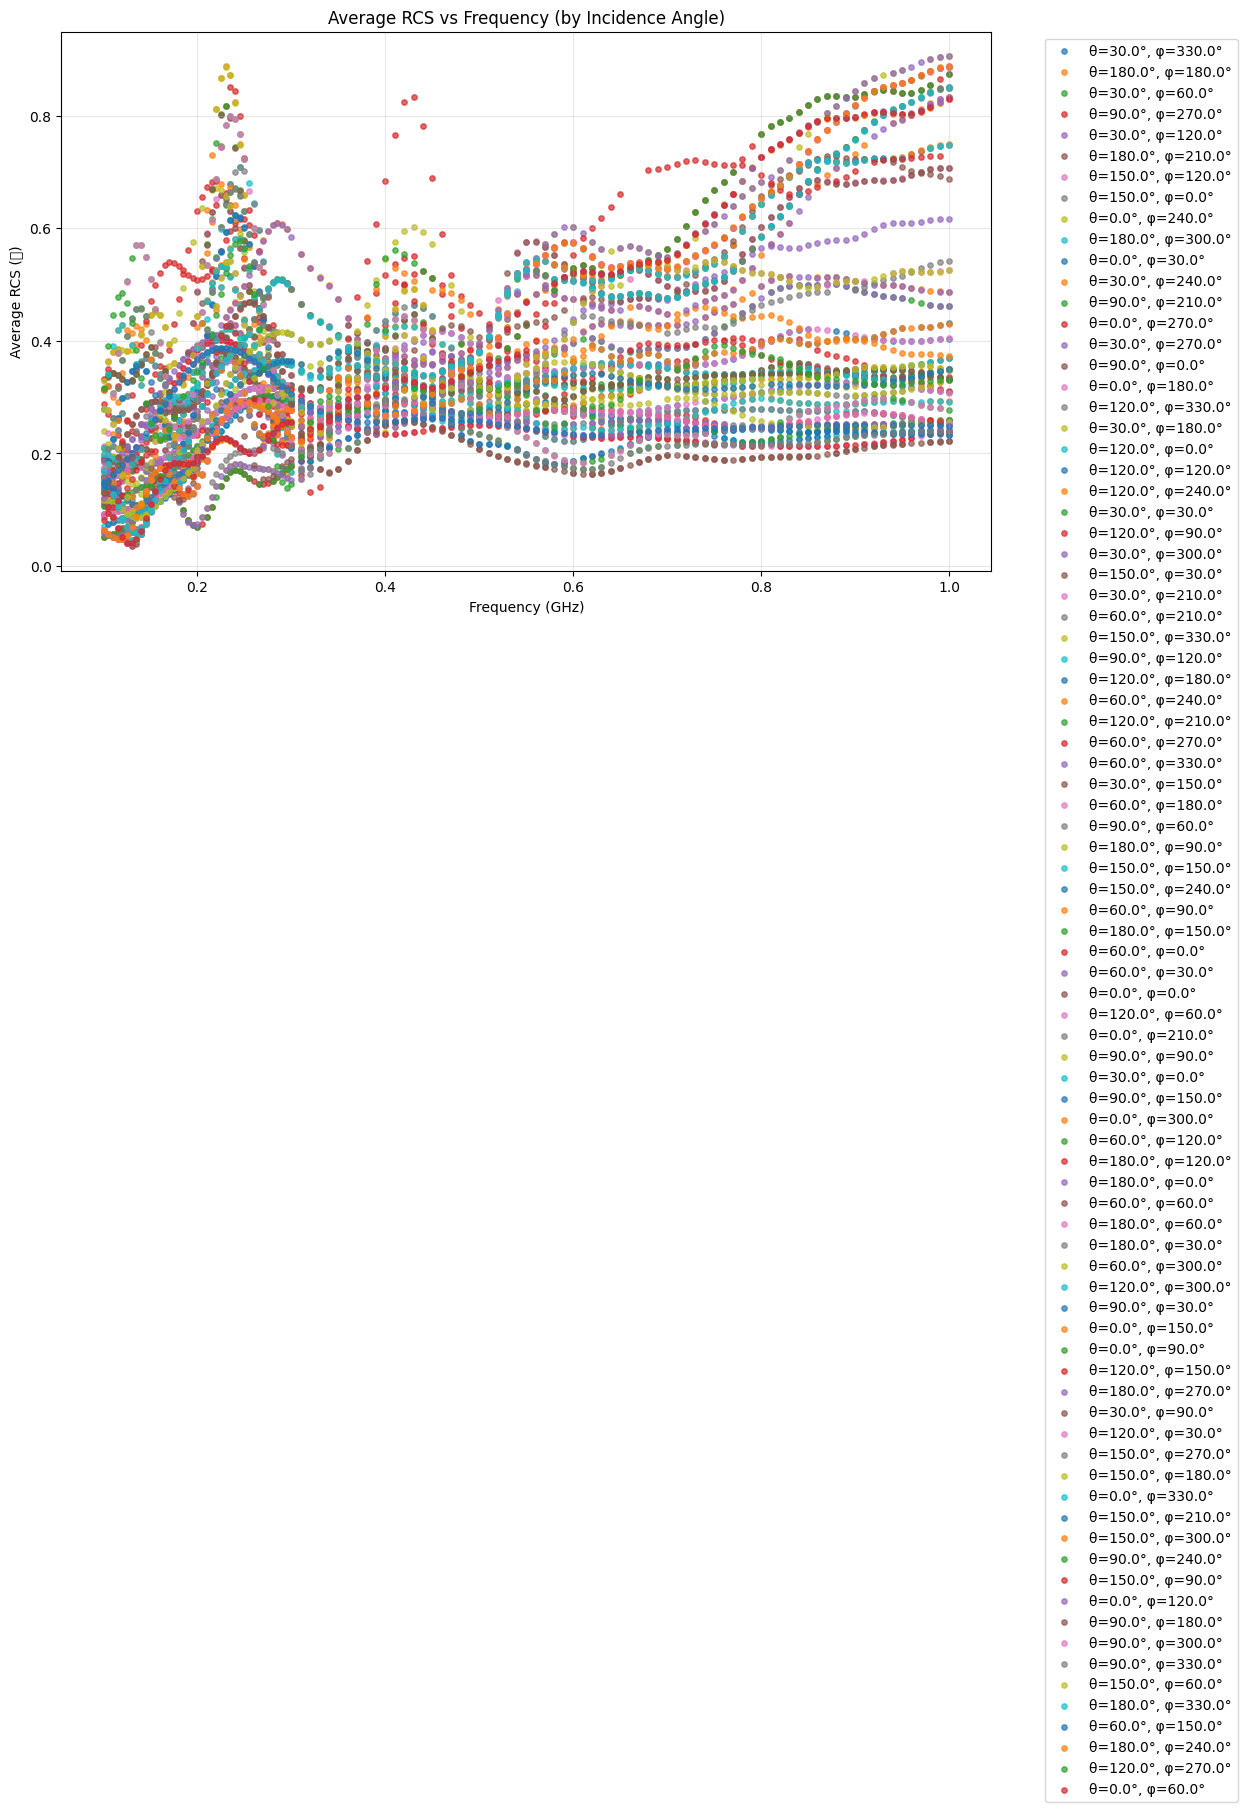

In [ ]:
#区分入射角颜色
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from net.utils import EMRCSDataset
import torch.utils.data.dataloader as DataLoader

rcsdir = r'/mnt/truenas_jiangxiaotian/allplanes/mie/b943_mie_train'
save_dir = f'output/datamining/{rcsdir.split("/")[-1]}:aveRCS_diffInc.png'
dataset = EMRCSDataset(rcsdir)
dataloader = DataLoader.DataLoader(dataset, batch_size=12, shuffle=False, num_workers=16, pin_memory=True)
# dataloader = DataLoader.DataLoader(dataset, batch_size=2, shuffle=False)

# 数据结构：{(theta, phi): {'freqs': [], 'rcs': []}}
angle_data = defaultdict(lambda: {'freqs': [], 'rcs': []})

for i, data in enumerate(dataloader):
    label, rcs = data[0], data[1]  # label = [plane, theta, phi, freq]
    
    # 获取当前batch的所有角度和频率
    theta_batch = label[1]  # 入射角theta
    phi_batch = label[2]    # 方位角phi
    freq_batch = label[3]   # 频率
    ave_rcs_batch = rcs.mean(dim=(1, 2))  # 平均RCS
    
    # 按角度分组存储
    for theta, phi, freq, rcs_val in zip(theta_batch, phi_batch, freq_batch, ave_rcs_batch):
        angle_key = (float(theta), float(phi))
        angle_data[angle_key]['freqs'].append(float(freq))
        angle_data[angle_key]['rcs'].append(float(rcs_val))

# 按(theta, phi)排序
# sorted_angles = sorted(angle_data.keys(), key=lambda x: (x[0], x[1]))

# 绘图
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(angle_data)))

for (theta, phi), color in zip(angle_data.keys(), colors):
    data = angle_data[(theta, phi)]
    plt.scatter(data['freqs'], data['rcs'], s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')
    # plt.scatter(data['freqs'], data['rcs'], color=color, s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')

plt.xlabel('Frequency (GHz)')
plt.ylabel('Average RCS (㎡)')
plt.title('Average RCS vs Frequency (by Incidence Angle)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_4009096/377667115.py:51: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4009096/377667115.py:52: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  plt.savefig(save_dir, dpi=300, bbox_inches='tight')
/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


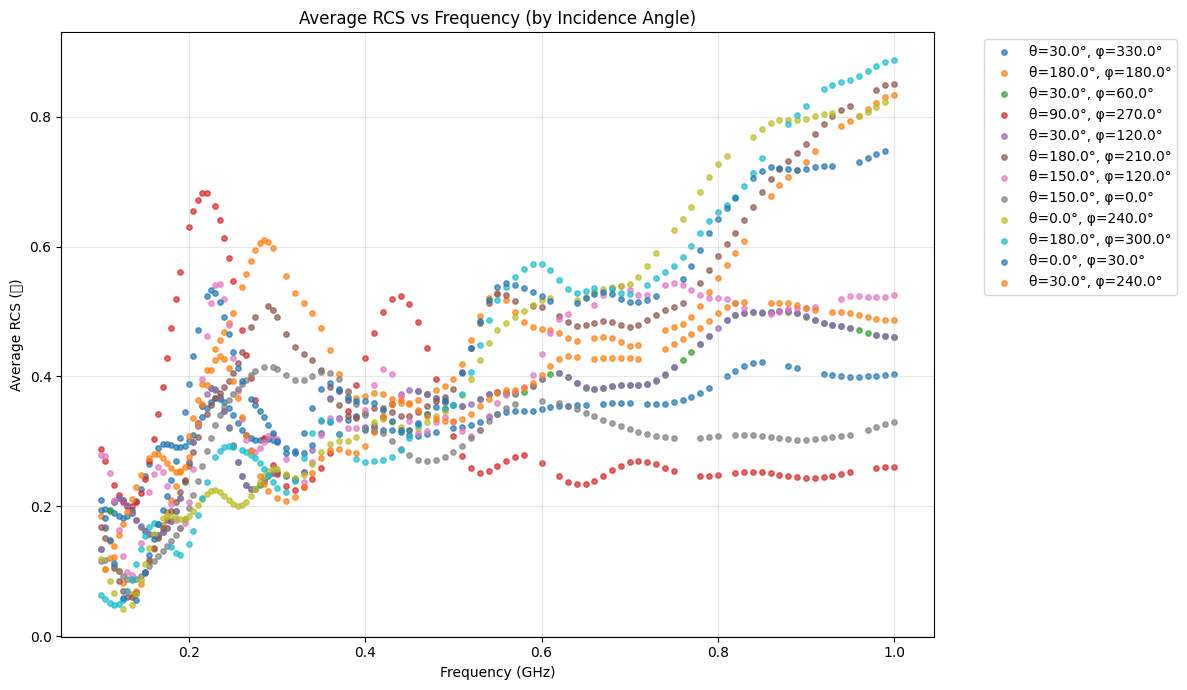

In [22]:
#区分入射角颜色且只画几个
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from net.utils import EMRCSDataset
import torch.utils.data.dataloader as DataLoader

rcsdir = r'/mnt/truenas_jiangxiaotian/allplanes/mie/b943_mie_train'
save_dir = f'output/datamining/{rcsdir.split("/")[-1]}:aveRCS_diffInc10curve.png'
dataset = EMRCSDataset(rcsdir)
dataloader = DataLoader.DataLoader(dataset, batch_size=12, shuffle=False, num_workers=16, pin_memory=True)
# dataloader = DataLoader.DataLoader(dataset, batch_size=2, shuffle=False)

# 数据结构：{(theta, phi): {'freqs': [], 'rcs': []}}
angle_data = defaultdict(lambda: {'freqs': [], 'rcs': []})

for i, data in enumerate(dataloader):
    label, rcs = data[0], data[1]  # label = [plane, theta, phi, freq]
    
    # 获取当前batch的所有角度和频率
    theta_batch = label[1]  # 入射角theta
    phi_batch = label[2]    # 方位角phi
    freq_batch = label[3]   # 频率
    ave_rcs_batch = rcs.mean(dim=(1, 2))  # 平均RCS
    
    # 按角度分组存储
    for theta, phi, freq, rcs_val in zip(theta_batch, phi_batch, freq_batch, ave_rcs_batch):
        angle_key = (float(theta), float(phi))
        angle_data[angle_key]['freqs'].append(float(freq))
        angle_data[angle_key]['rcs'].append(float(rcs_val))

# 按(theta, phi)排序
# sorted_angles = sorted(angle_data.keys(), key=lambda x: (x[0], x[1]))

# 绘图
plt.figure(figsize=(12, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(angle_data)))

for k,((theta, phi), color) in enumerate(zip(angle_data.keys(), colors)):
    data = angle_data[(theta, phi)]
    plt.scatter(data['freqs'], data['rcs'], s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')
    # plt.scatter(data['freqs'], data['rcs'], color=color, s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')
    if k > 10:  # 只画前10个角度
        break   

plt.xlabel('Frequency (GHz)')
plt.ylabel('Average RCS (㎡)')
plt.title('Average RCS vs Frequency (by Incidence Angle)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa473b6eca0>
Traceback (most recent call last):
  File "/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa473b6eca0>
Traceback (most recent call last):
  File "/home/jiangxiaotian/anaconda3/envs/jxtnet/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/jiangxiaoti

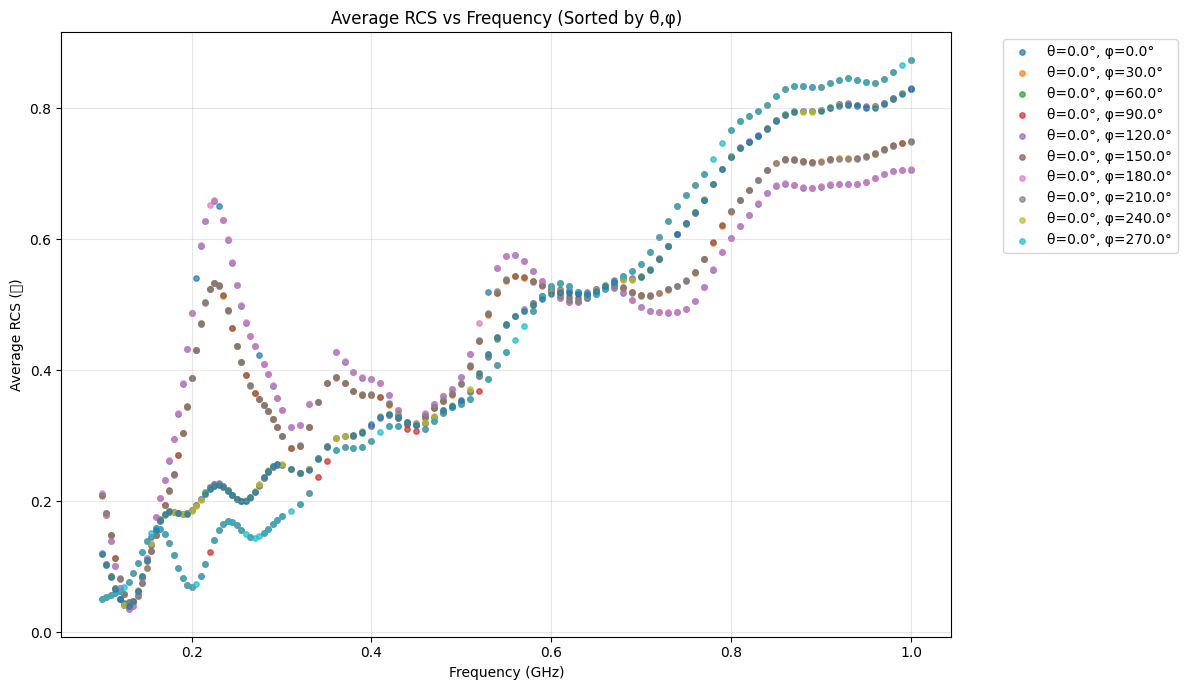

In [27]:
#区分入射角颜色且只画几个且排序
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from net.utils import EMRCSDataset
import torch.utils.data.dataloader as DataLoader

rcsdir = r'/mnt/truenas_jiangxiaotian/allplanes/mie/b943_mie_train'
save_dir = f'output/datamining/{rcsdir.split("/")[-1]}:aveRCS_diffInc_10curve_sorted.png'
dataset = EMRCSDataset(rcsdir)
dataloader = DataLoader.DataLoader(dataset, batch_size=12, shuffle=False, num_workers=16, pin_memory=True)

# 数据结构：{(theta, phi): {'freqs': [], 'rcs': []}}
angle_data = defaultdict(lambda: {'freqs': [], 'rcs': []})

for i, data in enumerate(dataloader):
    label, rcs = data[0], data[1]  # label = [plane, theta, phi, freq]
    
    theta_batch = label[1]  # 入射角theta
    phi_batch = label[2]    # 方位角phi
    freq_batch = label[3]   # 频率
    ave_rcs_batch = rcs.mean(dim=(1, 2))  # 平均RCS
    
    for theta, phi, freq, rcs_val in zip(theta_batch, phi_batch, freq_batch, ave_rcs_batch):
        angle_key = (float(theta), float(phi))
        angle_data[angle_key]['freqs'].append(float(freq))
        angle_data[angle_key]['rcs'].append(float(rcs_val))

# 按(theta, phi)排序
sorted_angles = sorted(angle_data.keys(), key=lambda x: (x[0], x[1]))

# 绘图
plt.figure(figsize=(12, 7))
# colormap = plt.get_cmap('viridis', len(sorted_angles))

for idx, (theta, phi) in enumerate(sorted_angles):
    data = angle_data[(theta, phi)]
    # 对每个角度的数据按频率排序（确保连线顺序正确）
    sorted_by_freq = sorted(zip(data['freqs'], data['rcs']), key=lambda x: x[0])
    freqs_sorted = [x[0] for x in sorted_by_freq]
    rcs_sorted = [x[1] for x in sorted_by_freq]
    
    plt.scatter(freqs_sorted, rcs_sorted, s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')
    # plt.scatter(freqs_sorted, rcs_sorted, color=colormap(idx/len(sorted_angles)), s=15, alpha=0.7, label=f'θ={theta}°, φ={phi}°')
    # # 添加连线（可选）
    # plt.plot(freqs_sorted, rcs_sorted, 
    #         color=colormap(idx/len(sorted_angles)),
    #         alpha=0.3, lw=1)
    if idx >= 10:
        break

plt.xlabel('Frequency (GHz)')
plt.ylabel('Average RCS (㎡)')
plt.title('Average RCS vs Frequency (Sorted by θ,φ)')
plt.grid(True, alpha=0.3)

# 控制图例数量（如果太多可以只显示部分）
if len(sorted_angles) <= 20:
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    # 显示首10个示例
    sample_indices = list(range(10))
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handles[i] for i in sample_indices],
              [labels[i] for i in sample_indices],
              bbox_to_anchor=(1.05, 1), loc='upper left')
# else:
#     # 显示首尾各5个示例
#     sample_indices = list(range(5)) + list(range(-5, 0))
#     handles, labels = plt.gca().get_legend_handles_labels()
#     plt.legend([handles[i] for i in sample_indices],
#               [labels[i] for i in sample_indices],
#               bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(save_dir, dpi=300, bbox_inches='tight')
plt.show()